# Assignment 1



uploaded to https://colab.research.google.com/drive/1ymH1O2WjmliPATUWIB2LAuWJusWmFItz?usp=sharing

## prerequirement 

pip install the related packages


In [1]:
%pip install tensorflow pandas numpy opencv-python sklearn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Step 1 : data conversion


### Step 1.1 : convert the data from raw data to dataframe

from the raw data, 

In [2]:
import zipfile

# from pprint import pprint

import zipfile

def load_data():
    """
    Extracts the contents of a zip file and saves them in a 'dataset' directory.

    Parameters:
    None

    Returns:
    None
    """
    # extract the zip file
    with zipfile.ZipFile("dataset_42028assg1_24581896.zip", "r") as file:
        # extract the file
        file.extractall("dataset")

    pass


load_data()

In [3]:
import pandas as pd
import numpy as np
import os
# import tensorflow as tf
import glob
import cv2

# import tensorflow

# data struct
# {
#     id: int,
#     label: str,
#     data: np.array
# }


# load the data into a pandas dataframe
def load_data():
    """
    Load the data from the 'dataset' directory and return it as a DataFrame.

    Returns:
        data (DataFrame): A DataFrame containing the loaded data.
        labels (list): A list of labels corresponding to the loaded data.
    """
    data_list = []
    labels = [x for x in os.listdir("dataset")]

    for label in labels:
        for file in glob.glob(f"dataset/{label}/*.jpg"):
            file_data = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
            file_data = cv2.resize(file_data, (96, 96), interpolation=cv2.INTER_LINEAR)
            data_list.append(
                {
                    "label": label,
                    "label_id": labels.index(label),
                    "filename": file,
                    "data": file_data
                }
            )
    return pd.DataFrame(data_list), labels


data_df, labels = load_data()

print(data_df.head(5))
print(labels)

5000
  label  label_id                  filename  \
0   div         0   dataset/div/exp1115.jpg   
1   div         0  dataset/div/exp53551.jpg   
2   div         0  dataset/div/exp18752.jpg   
3   div         0  dataset/div/exp51352.jpg   
4   div         0  dataset/div/div_1778.jpg   

                                                data  
0  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
1  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
2  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
3  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
4  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
['div', '+', 'cos', 'neq', 'alpha', ']', '(', 'tan', '[', 'geq']


In [38]:
import matplotlib.pyplot as plt
import cv2
def show_image(input_image):
  """
  Display the input image.

  Parameters:
  input_image (numpy.ndarray): The input image to be displayed.

  Returns:
  None
  """
  plt.imshow(input_image, cmap='gray')  # Make sure that the plot is drawn in grayscale
  plt.axis('off')
  plt.title("Input Image")
  plt.show()

def show_image_with_label(input_image, label):
    """
    Display the input image with the corresponding label.

    Parameters:
    input_image (numpy.ndarray): The input image to be displayed.
    label (str): The label corresponding to the input image.

    Returns:
    None
    """

    # plt.title(f"Input Image: {label}")
    # plt.show()
    color = (0, 255, 0)
    # image = input_image.copy()
    image = cv2.resize(input_image, (96, 96), interpolation=cv2.INTER_LINEAR)
    cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.50, color, 2)
    plt.imshow(image)  # Make sure that the plot is drawn in grayscale
    return image

In [5]:
import pandas as pd
# import pickle
from sklearn.model_selection import train_test_split


## snapshot the data
def snapshot_data(data: pd.DataFrame, labels: list):
    """
    Snapshot the data and store it as a file.

    Parameters:
    - data (pd.DataFrame): The data to be snapshot.
    - labels (list): The list of labels.

    Returns:
    None
    """
    # snapshot the data
    # store the data as a file
    data.to_pickle('./raw_data.pkl')
    with open("labels.txt", "w") as file:
        file.write("\n".join(labels))

    return


def shuffle_data(data_df: pd.DataFrame):
    """
    Shuffles the data in the given DataFrame and splits it into training and testing sets.

    Parameters:
    - data_df (pd.DataFrame): The DataFrame containing the data to be shuffled.

    Returns:
    - Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]: A tuple containing the shuffled training and testing sets.
    """
    clone_df_X = data_df.copy()
    clone_df_y = data_df.copy()
    # shuffle the data
    clone_df_X = clone_df_X.drop(columns=["filename", "label", "label_id"])
    clone_df_y = clone_df_y.drop(columns=["filename", "data", "label"])
    return train_test_split(
        clone_df_X, clone_df_y, test_size=0.3, random_state=24581896
    )


# snapshot the data
snapshot_data(data_df, labels)


# usage; for later use

#  do the snapshot for the shuffled data 




In [6]:
X_train, X_test, y_train, y_test = shuffle_data(data_df)
print(X_train.head(5))
print(y_train.head(5))

                                                   data
4306  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
1617  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3925  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
971   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
3544  [[255, 255, 255, 255, 255, 255, 255, 255, 255,...
      label_id
4306         8
1617         3
3925         7
971          1
3544         7


here is the data snapshot


In [7]:
# data-snapshot
X_train.to_pickle("X_train_raw.pkl")
X_test.to_pickle("X_test_raw.pkl")
y_train.to_pickle("y_train_raw.pkl")
y_test.to_pickle("y_test_raw.pkl")

so, we can read the data from the file, so we can skip the data conversion step (1.1.)


In [1]:
import pandas as pd
# data recovery
X_train_raw = pd.read_pickle("X_train_raw.pkl")
X_test_raw = pd.read_pickle("X_test_raw.pkl")
y_train_raw = pd.read_pickle("y_train_raw.pkl")
y_test_raw = pd.read_pickle("y_test_raw.pkl")

labels = open("labels.txt", "r").read().split("\n")

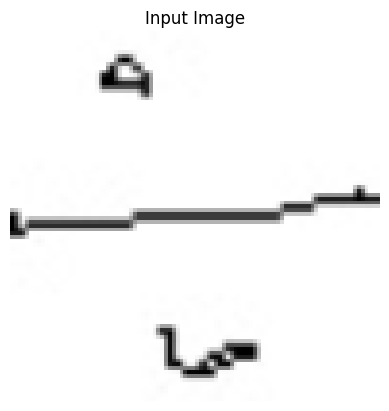

(96, 96)

In [5]:
show_image(X_train_raw["data"][2])
X_train_raw["data"][1].shape

### Step 1.2. : HoG Feature

#### Step 1.2.1 : HoG Feature Setting

In [2]:
import cv2
import numpy as np

class HoGSetting:
    """
    Class representing the settings for Histogram of Oriented Gradients (HoG) feature extraction.

    Attributes:
        cell_size (tuple): The size of each cell in the HoG grid.
        block_size (tuple): The size of each block in the HoG grid.
        win_size (tuple): The size of the sliding window used for feature extraction.
        nbins (int): The number of bins in the HoG histogram.
        hog_descriptor (cv2.HOGDescriptor): The HoG descriptor object.

    Methods:
        __init__(self, **kwarg): Initializes the HoGSetting object with the given settings.
        compile_feat(self, img): Computes the HoG features for the given image.

    """

    cell_size: tuple = (12,12)
    block_size: tuple = (4,4)
    win_size: tuple = (8,8)
    nbins: int = 9
    hog_descriptor: cv2.HOGDescriptor

    def __init__(self, **kwarg):
        """
        Initializes the HoGSetting object with the given settings.

        Args:
            **kwarg: Keyword arguments to override the default settings.
        
        """
        # initialize
        self.cell_size = kwarg.get('cell_size', self.cell_size)
        self.block_size = kwarg.get('block_size', self.block_size)
        self.win_size = kwarg.get('win_size', self.win_size)
        self.nbins = kwarg.get('nbins', self.nbins)

        # create a HOG object
        self.hog_descriptor = cv2.HOGDescriptor(
            _winSize=(self.win_size[1] * self.cell_size[1],
                    self.win_size[0] * self.cell_size[0]),
            _blockSize=(self.block_size[1] * self.cell_size[1],
                        self.block_size[0] * self.cell_size[0]),
            _blockStride=(self.cell_size[1], self.cell_size[0]),
            _cellSize=(self.cell_size[1], self.cell_size[0]),
            _nbins=self.nbins,
            _histogramNormType = cv2.HOGDescriptor_L2Hys
        )
        self.hog_descriptor.save('hog_feat.xml')

    def compile_feat(self, img):
        """
        Computes the HoG features for the given image.

        Args:
            img: The input image for feature extraction.

        Returns:
            hog_feats: The computed HoG features.

        """
        hog_feats = self.hog_descriptor.compute(img)

        # hog_feats = hog_feats.reshape()
        return hog_feats
    pass


def compile_hog_features(data: pd.DataFrame, hog_setting: HoGSetting):
    """
    Compiles the HOG (Histogram of Oriented Gradients) features for each data point in the given DataFrame.

    Args:
        data (pd.DataFrame): The DataFrame containing the data points.
        hog_setting (HoGSetting): The HoGSetting object that specifies the HOG feature extraction settings.

    Returns:
        pd.DataFrame: The DataFrame with an additional column "hog_feat" containing the compiled HOG features.

    """
    data["hog_feat"] = data["data"].apply(lambda x: hog_setting.compile_feat(x))
    return data


hog_setting = HoGSetting()

### usage; for later use

# _hog_feat = hog_setting.compile_feat(img)
# print(_hog_feat)

In [40]:
# sample testing
X_train_raw["data"].iloc[0]
smpl= hog_setting.compile_feat(X_train_raw["data"].iloc[0])
print(smpl.shape)
smpl

(3600,)


#### Step 1.2.2. : HoG Feature applying 

In [3]:



X_train = compile_hog_features(X_train_raw, hog_setting)
X_test = compile_hog_features(X_test_raw, hog_setting)

X_train.to_pickle("X_train__snap_1_2.pkl")
X_test.to_pickle("X_test__snap_1_2.pkl")

for data recover and visualization, we need to load the HoG feature to the disk.

In [5]:
import pandas as pd
X_train_svm = pd.read_pickle("./X_train__snap_1_2.pkl")
X_test_svm = pd.read_pickle("./X_test__snap_1_2.pkl")
labels = open("labels.txt", "r").read().split("\n")

In [6]:
X_train_svm.head(5)


,data,hog_feat
4306,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[3.5819154e-05, 2.6299201e-06, 7.869693e-06, 0..."
1617,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[1.9874208e-06, 2.1268988e-06, 8.553343e-06, 4..."
3925,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[5.725465e-07, 1.4243699e-07, 4.2622415e-07, 0..."
971,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3544,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,...","[1.21851335e-05, 2.3631686e-05, 4.4742497e-05,..."


### Step 1.3. : LBP Feature

#### Step 1.3.1. : LBP Feature Setting

In [11]:
import numpy as np
from skimage.feature import local_binary_pattern

class LBPSetting:
    numPoints :int 
    radius: int
    method: str ="uniform"
    eps: float = 1e-7
    def __init__(self, **kwarg):
        # initialize
        self.numPoints = kwarg.get('numPoints', 8)
        self.radius = kwarg.get('radius', 1)
        self.method = kwarg.get('method', "uniform")
        self.eps = kwarg.get('eps', 1e-7)

    # compile, for svm
    def compile_feat(self, img):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = local_binary_pattern(img, self.numPoints, self.radius, self.method )
        # Form the histogram
        (hist, _) = np.histogram(lbp.ravel(),
          bins=np.arange(0, self.numPoints + 3),
          range=(0, self.numPoints + 2))

        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + self.eps)
        return hist
    pass

def compile_lbp_features(data: pd.DataFrame, lbp_setting: LBPSetting):
    data["lbp_feat"] = data["data"].apply(lambda x: lbp_setting.compile_feat(x))
    return data
    

lbp_setting = LBPSetting()

#### Step 1.3.2. : LBP Feature Applying

In [12]:
X_train_svm= compile_lbp_features(X_train_svm, lbp_setting)
X_test_svm = compile_lbp_features(X_test_svm, lbp_setting)

X_train_svm.to_pickle("X_train__snap_1_3.pkl")
X_test_svm.to_pickle("X_test__snap_1_3.pkl")

In [1]:
# data recovery
import pandas as pd
X_train_svm = pd.read_pickle("X_train__snap_1_3.pkl")
X_test_svm = pd.read_pickle("X_test__snap_1_3.pkl")
labels = open("labels.txt", "r").read().split("\n")
y_train_raw = pd.read_pickle("y_train_raw.pkl")
y_test_raw = pd.read_pickle("y_test_raw.pkl")

## Step 2 : SVM Model Training

since the dataset is not enstrenght, we need to preprocess the data to make it suitable for training the model.

1. create a HoG feature setting for setting managing.
2. apply the HoG feature extraction to the images.
3. create a SVM model 
4. train classifier by SVM multiclass classifier


### Step 2.1. : create the SVM model processing

- `process_svm_model:` 
  This function trains an SVM model with a Radial basis function (RBF) kernel. It takes in training data and labels as input and returns the trained model.

- `evaluate_svm_model:` 
  This function evaluates the SVM model by calculating the accuracy score. It takes in the model, test data, and test labels as input and returns the accuracy score.

- `predict_svm_model:`
  This function makes predictions using the SVM model. It takes in the model and test data as input and returns the predicted labels.

- `confusion_matrix_svm_model:` 
  This function generates a confusion matrix for the SVM model predictions and visualizes it using seaborn and matplotlib. It takes in the actual and predicted labels as input and returns the confusion matrix and accuracy score.

- `save_svm_model:` 
  This function saves the trained SVM model to a file using joblib. It takes in the model and filename as input and doesn't return anything. The model is saved in the current directory with a filename that includes the model's class name and the provided filename.

In [2]:
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import joblib

def process_svm_model(data_train, labels_train):
    """
    Trains a Support Vector Machine (SVM) model using the RBF kernel.

    Args:
        data_train (array-like): The training data.
        labels_train (array-like): The labels corresponding to the training data.

    Returns:
        model (SVC): The trained SVM model.
    """
    model = svm.SVC(kernel='rbf', C=100.0, random_state=24581896)
    model.fit(data_train, labels_train)
    return model


def evaluate_svm_model(model, data_test, labels_test):
    """
    Evaluates the performance of an SVM model on the test data.

    Args:
        model (SVC): The trained SVM model.
        data_test (array-like): The test data.
        labels_test (array-like): The labels corresponding to the test data.

    Returns:
        float: The accuracy score of the model on the test data.
    """
    return model.score(data_test, labels_test)


def predict_svm_model(model, data_test):
    """
    Predicts the labels for the test data using an SVM model.

    Args:
        model (SVC): The trained SVM model.
        data_test (array-like): The test data.

    Returns:
        array-like: The predicted labels for the test data.
    """
    return model.predict(data_test)


def confusion_matrix_svm_model(y_test, y_predict):
    """
    Computes the confusion matrix for an SVM model and visualizes it using a heatmap.

    Args:
        y_test (array-like): The true labels.
        y_predict (array-like): The predicted labels.

    Returns:
        tuple: A tuple containing the confusion matrix and the accuracy score.
    """
    accuracy = metrics.accuracy_score(y_test, y_predict)
    print("Accuracy on test dataset:", accuracy)
    cm = metrics.confusion_matrix(y_test, y_predict)
    plt.figure(figsize=(9, 9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square=True, cmap="Blues_r")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")
    all_sample_title = "Accuracy Score: {0}".format(accuracy)
    plt.title(all_sample_title, size=15)

    return cm, accuracy


def save_svm_model(model, filename):
    """
    Saves an SVM model to a file using joblib.

    Args:
        model (SVC): The SVM model to be saved.
        filename (str): The name of the file to save the model to.
    """
    joblib.dump(
        model,
        "./model_{model_name}_{filename}.pkl".format(
            model_name=model.__class__.__name__,
            filename=filename
        ),
    )


### Step 2.2. : Model Training, Prediction and Evaluation

In [34]:
# for the raw data
import time


def batch_svm_model_set(x_reference_key):
    """
    Process the SVM model for a given reference key.

    Args:
        x_reference_key (str): The reference key for the features.

    Returns:
        None
    """
    from sklearn.metrics import log_loss

    print("Processing the svm model for ", x_reference_key)
    print("with number of features: ", X_train_svm[x_reference_key].shape)
    time_start = time.time()
    svm_model = process_svm_model(
        X_train_svm[x_reference_key].to_list(), y_train_raw["label_id"].to_list()
    )
    print(
        "train set : ",
        evaluate_svm_model(
            svm_model,
            X_train_svm[x_reference_key].to_list(),
            y_train_raw["label_id"].to_list(),
        ),
    )
    print(
        "test set : ",
        evaluate_svm_model(
            svm_model,
            X_test_svm[x_reference_key].to_list(),
            y_test_raw["label_id"].to_list(),
        ),
    )
    save_svm_model(svm_model, x_reference_key)
    time_pred_start = time.time()
    y_predict = predict_svm_model(svm_model, X_test_svm[x_reference_key].to_list())
    time_pred_end = time.time()
    confusion_matrix_svm_model(y_test_raw["label_id"].to_list(), y_predict)
    # svm_model.predict_log_proba
    time_end = time.time()
    print("Time elapsed: ", time_end - time_start)
    print("Time elapsed for prediction: ", time_pred_end - time_pred_start)
    print("sample : ")
    fig = plt.figure()
    for i in range(5):
        print("predict: " + y_predict[i] + " actual: " + labels[y_test_raw["label_id"].iloc[i]])
        
        show_image_with_label(X_test_svm["data"].iloc[i], labels[y_predict[i]])
        
    fig.show()
    return

### Step 2.4. : Model Prediction and Evaluation

Processing the svm model for  flatten_data
with number of features:  (3500,)
train set :  1.0
test set :  0.9906666666666667
Accuracy on test dataset: 0.9906666666666667
Time elapsed:  155.89423537254333
Time elapsed for prediction:  24.37809109687805


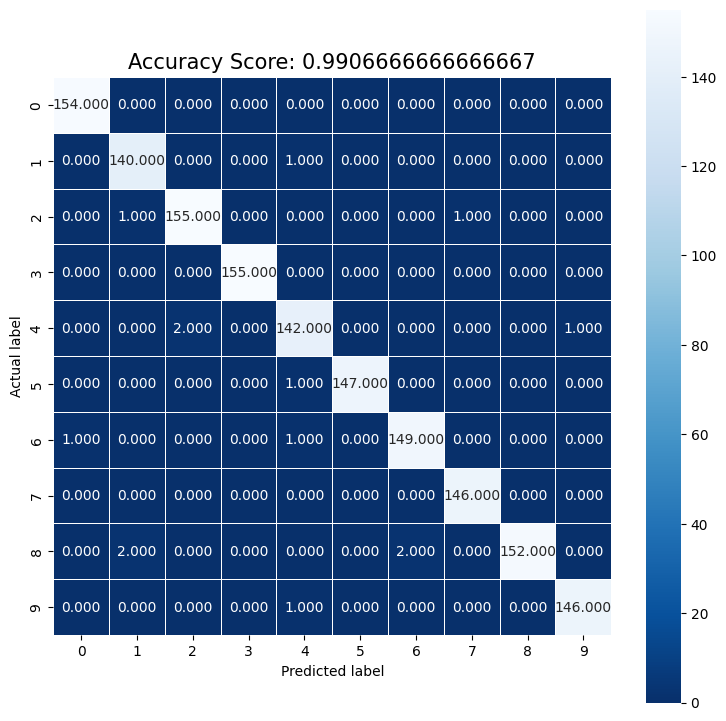

In [7]:
# for the raw data
# since the raw data is 2D matrix, we need to flatten it

X_train_svm["flatten_data"] = X_train_svm["data"].apply(lambda x: x.flatten())
X_train_svm["flatten_data"] = X_train_svm["flatten_data"] / 255.0
X_test_svm['flatten_data'] = X_test_svm['data'].apply(lambda x: x.flatten())
X_test_svm["flatten_data"] = X_test_svm["flatten_data"] / 255.0


batch_svm_model_set("flatten_data")

Processing the svm model for  hog_feat
with number of features:  (3500,)
train set :  1.0
test set :  0.9973333333333333
Accuracy on test dataset: 0.9973333333333333
Time elapsed:  24.302340030670166
Time elapsed for prediction:  3.9031097888946533
sample : 


/var/folders/tp/59n9gy8153dbtg68mx8jmptm0000gn/T/ipykernel_18609/3458296662.py:55: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


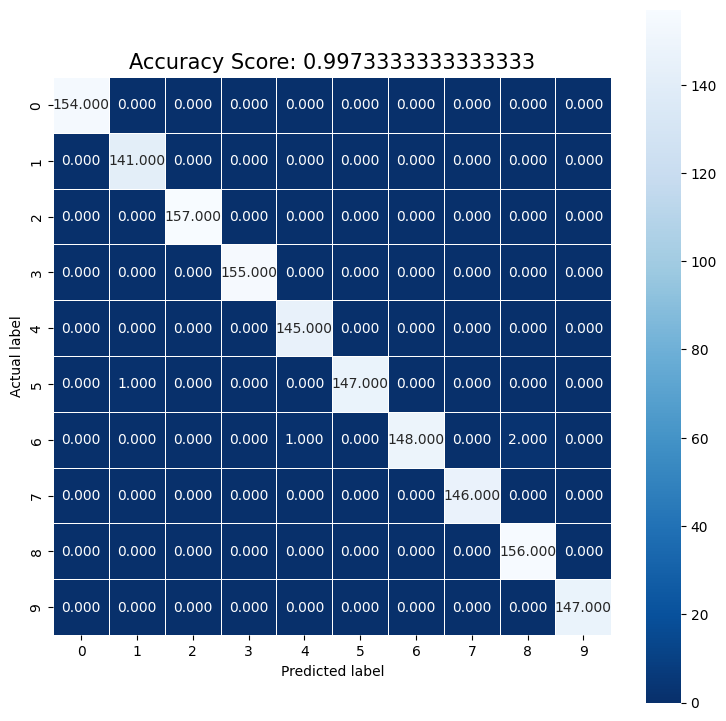

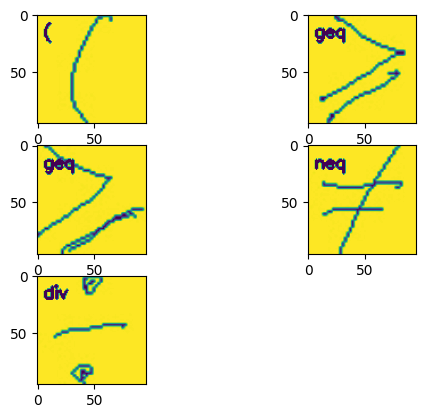

In [39]:
batch_svm_model_set("hog_feat")

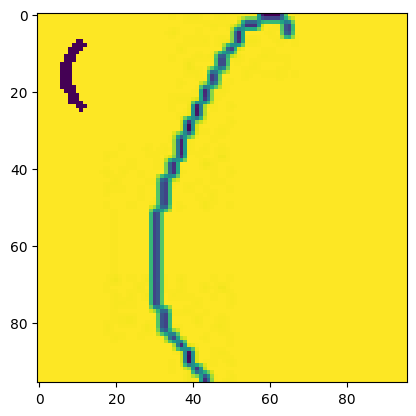

In [32]:
show_image_with_label(X_test_svm["data"].iloc[0], labels[y_test_raw['label_id'].iloc[0]])


Processing the svm model for  lbp_feat
with number of features:  (3500,)
train set :  0.566
test set :  0.564
Accuracy on test dataset: 0.564
Time elapsed:  0.9379808902740479
Time elapsed for prediction:  0.16972112655639648


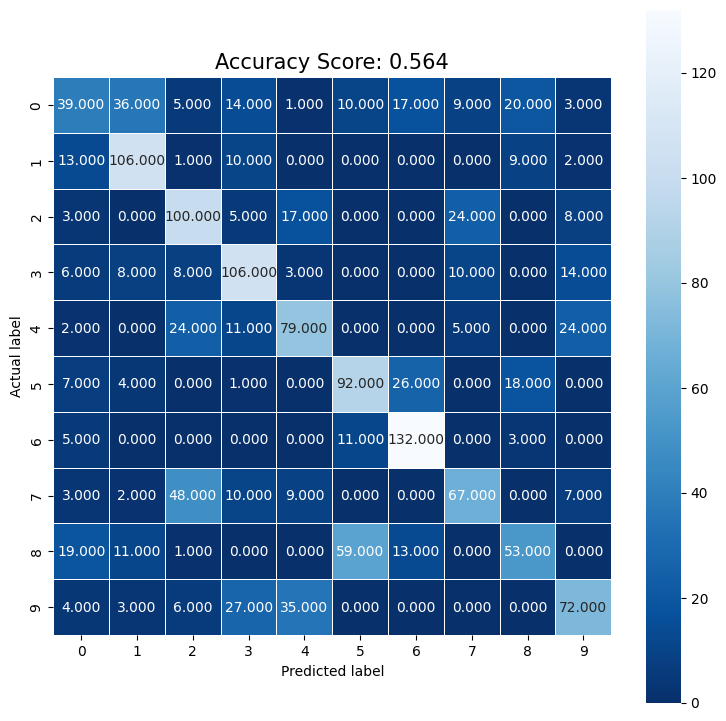

In [6]:
# for the lbp data
batch_svm_model_set("lbp_feat")

#### Remark :



## Step 3 : NN Model Training 

1. create a TensorFlow model
2. add the model layers
3. Model Training
4. Model Prediction and Evaluation

### Step 3.1. : create the NN model processing

- `convert_tf_set_2d`:
  Since the data is not fit into tensorflow Tensor data format, need to convert the data to the right format.

- `convert_tf_set_1d`:
  Since the data is not in the right format, we need to convert the data to the right format.

- `evaluate_tf_model`:
  Evaluate the model by the test data.

- `save_tf_model`:
  Save the TensorFlow model to a binary file, with a standardlize naming.

- `callback_setting`:
  Setting the callback for the model training, for the model training process monitoring.

  expected case like early done, or fail increase the accuracy in long time.

- `process_tfnn_2dconv_model`:
  Create a 2D Convolutional Neural Network model processing for the image classification.

  - Conv2D layer: 32 filters, 7x7 kernel size, strides 2x2, relu activation function, input shape (96, 96, 1)
  - MaxPooling2D layer: 4x4 pool size
  - Conv2D layer: 64 filters, 3x3 kernel size, relu activation function
  - MaxPooling2D layer: 2x2 pool size
  - Flatten layer
  - Dense layer: 96 units, relu activation function
  - Dense layer: 10 units, softmax activation function
  - with Adam optimizer, sparse_categorical_crossentropy loss function, 

- `process_tfnn_1dconv_model`:
  Create a 1D Convolutional Neural Network model processing for the image classification.

  - Dense layer: input_size (e.g.: 9216, 3500) units, relu activation function
  - Dropout layer: 0.05, reduce by 5%
  - Dense layer: (input_size / 4) units, relu activation function, depending on the input size is large enough to be divided by 16
  - Dropout layer: 0.05, reduce by 5%
  - Dense layer: (input_size / 16) units, relu activation function, depending on the input size is large enough to be divided by 16
  - Dropout layer: 0.05, reduce by 5%
  - Dense layer: 10 units, softmax activation function
  - with SGD optimizer, sparse_categorical_crossentropy loss function,

- `plot_tf_history`:
  Plot the model training history, for the model training process monitoring.

- `plot_tf_history_lost`:
  Plot the model training history, for the model training process monitoring.

In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np
import os
import PIL
import PIL.Image

# import tensorflow_datasets as tfds
import tensorflow.data as tfdata


def convert_tf_set_2d(x_set, y_set):
    """
    Convert the 2D data set to TensorFlow tensors.

    Args:
        x_set (pandas.DataFrame): The input data set.
        y_set (pandas.DataFrame): The target data set.

    Returns:
        tuple: A tuple containing the converted input and target data sets as TensorFlow tensors.
    """
    x_data = []
    for data in x_set["data"]:
        x_data.append(tf.convert_to_tensor(data))
    x_set = tf.convert_to_tensor(x_data)
    y_set = tf.convert_to_tensor(y_set["label_id"])

    return x_set, y_set


def convert_tf_set_1d(x_set, y_set):
    """
    Convert the 1D data set to TensorFlow tensors.

    Args:
        x_set (pandas.DataFrame): The input data set.
        y_set (pandas.DataFrame): The target data set.

    Returns:
        tuple: A tuple containing the converted input and target data sets as TensorFlow tensors.
    """
    x_set = tf.convert_to_tensor(x_set.to_list())
    y_set = tf.convert_to_tensor(y_set["label_id"])
    return x_set, y_set


def evaluate_tf_model(model, x_test, y_test):
    """
    Evaluate the TensorFlow model on the test data.

    Args:
        model (tf.keras.Model): The trained TensorFlow model.
        x_test (tf.Tensor): The input test data.
        y_test (tf.Tensor): The target test data.

    Returns:
        list: A list containing the evaluation results.
    """
    return model.evaluate(x_test, y_test)


def save_tf_model(model, filename):
    """
    Save the TensorFlow model to a file.

    Args:
        model (tf.keras.Model): The trained TensorFlow model.
        filename (str): The name of the file to save the model.
    """
    model.save(
        "./model_tf_{model_name}_{filename}.h5".format(
            model_name=model.__class__.__name__, filename=filename
        )
    )


import math


class callback_setting(tf.keras.callbacks.Callback):
    """
    Custom callback for TensorFlow model training.

    Args:
        epochs (int): The number of epochs for training.
    """

    def __init__(self, epochs):
        self.epochs = epochs

    def on_epoch_end(self, epoch, logs={}):
        if (
            logs.get("loss") == np.NAN
            or logs.get("val_loss") == np.NAN
            or math.isnan(logs.get("loss"))
            or math.isnan(logs.get("val_loss"))
        ):
            print("\n! NaN loss, cancelling training!")
            self.model.stop_training = True

        if (
            logs.get("accuracy") > 0.90
            and logs.get("accuracy") < 0.97
            and (epoch / self.epochs) > 0.35
        ):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True
        if (
            logs.get("val_accuracy") > 0.90
            and logs.get("val_accuracy") < 0.97
            and (epoch / self.epochs) > 0.35
        ):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

        if logs.get("accuracy") < 0.2 and (epoch / self.epochs) > 0.15:
            print("\n! Stuck at local minimum, cancelling training!")
            self.model.stop_training = True
        if logs.get("val_accuracy") < 0.2 and (epoch / self.epochs) > 0.15:
            print("\n! Stuck at local minimum, cancelling training!")
            self.model.stop_training = True

        if logs.get("accuracy") < 0.45 and (epoch / self.epochs) > 0.45:
            print("\n! Stuck at local minimum, cancelling training!")
            self.model.stop_training = True
        if logs.get("val_accuracy") < 0.45 and (epoch / self.epochs) > 0.45:
            print("\n! Stuck at local minimum, cancelling training!")
            self.model.stop_training = True


def process_tfnn_2dconv_model(
    x_train, y_train, labels_list, resolution_level=3, epochs=50, validation_split=0.2
):
    """
    Process a 2D convolutional TensorFlow model.

    Args:
        x_train (numpy.ndarray): The input training data.
        y_train (numpy.ndarray): The target training data.
        labels_list (list): The list of labels.
        resolution_level (int): The resolution level.
        epochs (int): The number of epochs for training.
        validation_split (float): The validation split ratio.

    Returns:
        tuple: A tuple containing the trained model and the training history.
    """
    pixel_size = x_train.shape[1]
    labels_count = len(labels_list)

    model = keras.Sequential(
        [
            layers.Conv2D(
                32,
                (7, 7),
                strides=(2, 2),
                activation="relu",
                input_shape=(pixel_size, pixel_size, 1),
                kernel_initializer="he_normal",
            ),
            layers.MaxPooling2D((4, 4)),
            layers.Conv2D(
                64,
                (3, 3),
                strides=(1, 1),
                activation="relu",
            ),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(pixel_size, activation="relu"),
            layers.Dense(labels_count, activation="softmax"),
        ]
    )

    # optimizer = keras.optimizers.SGD(learning_rate=1.25e-3)
    model.compile(
        optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
    )
    cb_setting = callback_setting(epochs=epochs)

    H = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=[cb_setting],
    )

    model.save("model_raw_2dconv.h5")
    return (model, H)


def process_tfnn_1dconv_model(
    x_train, y_train, labels_list, epochs=50, validation_split=0.2
):
    """
    Process a 1D convolutional TensorFlow model.

    Args:
        x_train (numpy.ndarray): The input training data.
        y_train (numpy.ndarray): The target training data.
        labels_list (list): The list of labels.
        epochs (int): The number of epochs for training.
        validation_split (float): The validation split ratio.

    Returns:
        tuple: A tuple containing the trained model and the training history.
    """
    input_size = x_train.shape[1]
    labels_count = len(labels_list)

    model = keras.Sequential(
        [
            layers.Dense(input_size, activation="relu", kernel_regularizer="l2"),
            layers.Dropout(0.05),
        ]
    )

    if (input_size // 4) > labels_count:
        model.add(
            layers.Dense(
                int(input_size // 4), activation="relu", kernel_regularizer="l2"
            )
        )

    elif (input_size // 16) > labels_count:
        model.add(
            layers.Dense(
                int(input_size // 16), activation="relu", kernel_regularizer="l2"
            )
        )
        
    model.add(layers.Dropout(0.05))

    model.add(layers.Dense(labels_count, activation="softmax"))

    optimizer = keras.optimizers.SGD(learning_rate=1.25e-3)

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    cb_setting = callback_setting(epochs=epochs)
    H = model.fit(
        x_train,
        y_train,
        epochs=epochs,
        validation_split=validation_split,
        callbacks=[cb_setting],
    )

    return (model, H)


def plot_tf_history(H):
    """
    Plot the training history of a TensorFlow model.

    Args:
        H (tf.keras.callbacks.History): The training history.
    """
    import pandas as pd
    import matplotlib.pyplot as plt

    pd.DataFrame(H.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)  # set the vertical range to [0-1]
    plt.show()


def plot_tf_history_lost(H):
    """
    Plot the training loss history of a TensorFlow model.

    Args:
        H (tf.keras.callbacks.History): The training history.
    """
    import matplotlib.pyplot as plt

    plt.plot(H.history["loss"])
    plt.ylabel("cost")
    plt.xlabel("Epochs")
    plt.title("Cost/Loss Curve")
    plt.show()

### Step 3.2. : create the NN model with preprocessed data

In [9]:
import time


def batch_nn_model_set(x_reference_key):
    """
    Process the 1D-NN model for a given x_reference_key.

    Args:
        x_reference_key: The key used to access the input data from X_train_svm and X_test_svm.

    Returns:
        None
    """
    print("Processing the 1D-NN model for ", x_reference_key)
    print("with number of features: ", X_train_svm[x_reference_key].shape)
    time_start = time.time()
    tf_train_x, tf_train_y = convert_tf_set_1d(
        X_train_svm[x_reference_key], y_train_raw
    )
    tf_test_x, tf_test_y = convert_tf_set_1d(X_test_svm[x_reference_key], y_test_raw)

    nn_model, model_hist = process_tfnn_1dconv_model(
        tf_train_x, tf_train_y, labels, epochs=500
    )
    nn_model.summary()

    print(
        "train set : ",
        evaluate_tf_model( nn_model, tf_train_x, tf_train_y),
    )
    print(
        "test set : ",
        evaluate_tf_model(nn_model, tf_test_x, tf_test_y),
    )
    save_tf_model(nn_model, x_reference_key)
    predict_time_start = time.time()
    y_predict = nn_model.predict(tf_test_x)
    y_predict = [np.argmax(x) for x in y_predict]
    predict_time_end = time.time()
    confusion_matrix_svm_model(y_test_raw["label_id"].to_list(), y_predict)
    plot_tf_history(model_hist)
    plot_tf_history_lost(model_hist)
    time_end = time.time()
    print("Build Time elapsed: ", time_end - time_start)
    print("Predict Time elapsed: ", predict_time_end - predict_time_start)
    return

Processing the 1D-NN model for  flatten_data
with number of features:  (3500,)


Epoch 1/500
88/88 [==============================] - ETA: 0s - loss: nan - accuracy: 0.1018
! NaN loss, cancelling training!
88/88 [==============================] - 3s 22ms/step - loss: nan - accuracy: 0.1018 - val_loss: nan - val_accuracy: 0.0843


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2304)              21235968  
                                                                 
 dropout_4 (Dropout)         (None, 2304)              0         
                                                                 
 dense_7 (Dense)             (None, 2304)              5310720   
                                                                 
 dropout_5 (Dropout)         (None, 2304)              0         
                                                                 
 dense_8 (Dense)             (None, 10)                23050     
                                                                 
Total params: 26569738 (101.36 MB)
Trainable params: 26569738 (101.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
110/110 [=

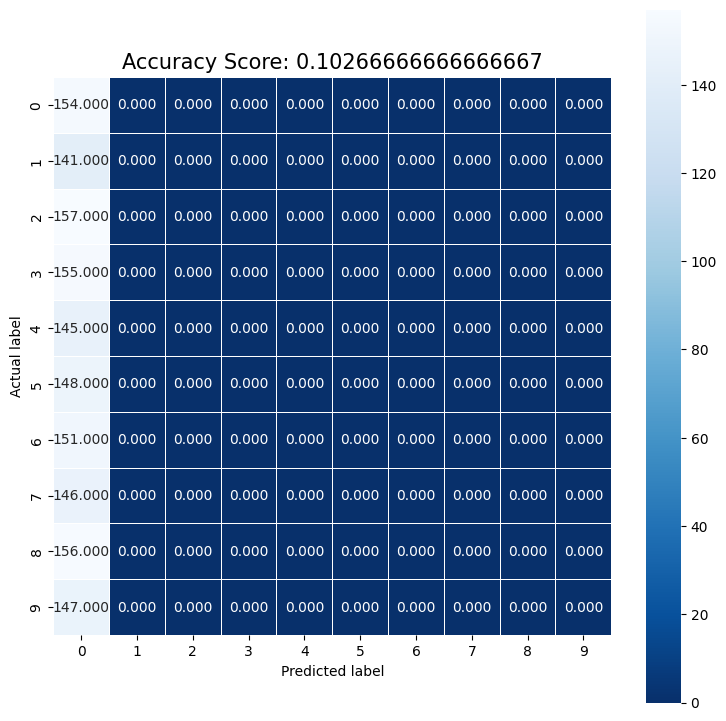

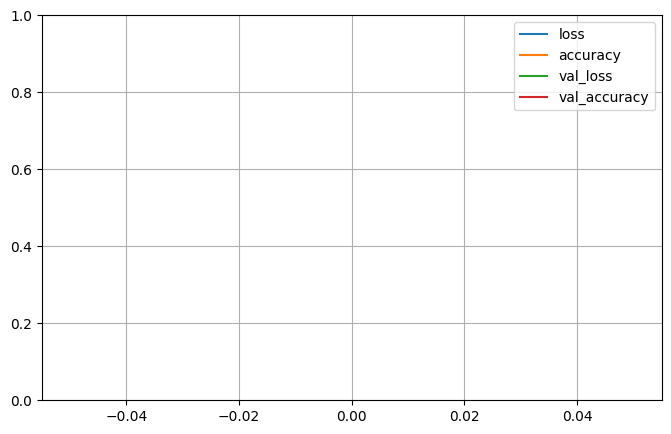

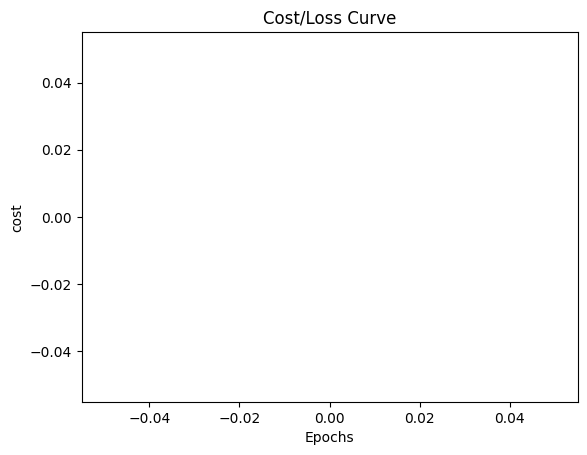

Build Time elapsed:  8.495464086532593
Predict Time elapsed:  0.2832162380218506


In [13]:
X_train_svm["flatten_data"] = X_train_svm["data"].apply(lambda x: x.flatten())
# X_train_svm["flatten_data"] = X_train_svm["data"] / 255.0
X_test_svm["flatten_data"] = X_test_svm["data"].apply(lambda x: x.flatten())
# X_test_svm["flatten_data"] = X_train_svm["data"] / 255.0

batch_nn_model_set("flatten_data")

Processing the 1D-NN model for  hog_feat
with number of features:  (3500,)
input size:  3600
labels count:  10
add layer 1 900
Epoch 1/500
88/88 [==============================] - 2s 15ms/step - loss: 52.5493 - accuracy: 0.1529 - val_loss: 52.3643 - val_accuracy: 0.2743
Epoch 2/500
88/88 [==============================] - 1s 13ms/step - loss: 52.1762 - accuracy: 0.3889 - val_loss: 51.9979 - val_accuracy: 0.5000
Epoch 3/500
88/88 [==============================] - 1s 13ms/step - loss: 51.8163 - accuracy: 0.5600 - val_loss: 51.6451 - val_accuracy: 0.6386
Epoch 4/500
88/88 [==============================] - 1s 13ms/step - loss: 51.4710 - accuracy: 0.6707 - val_loss: 51.3040 - val_accuracy: 0.7214
Epoch 5/500
88/88 [==============================] - 1s 13ms/step - loss: 51.1374 - accuracy: 0.7561 - val_loss: 50.9738 - val_accuracy: 0.7929
Epoch 6/500
88/88 [==============================] - 1s 13ms/step - loss: 50.8096 - accuracy: 0.8025 - val_loss: 50.6540 - val_accuracy: 0.8286
Epoch 7/5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 1s 10ms/step - loss: 23.4603 - accuracy: 0.9794
train set :  [23.460281372070312, 0.9794285893440247]
47/47 [==============================] - 0s 9ms/step - loss: 23.4636 - accuracy: 0.9813
test set :  [23.463623046875, 0.981333315372467]
47/47 [==============================] - 0s 2ms/step
Accuracy on test dataset: 0.9813333333333333


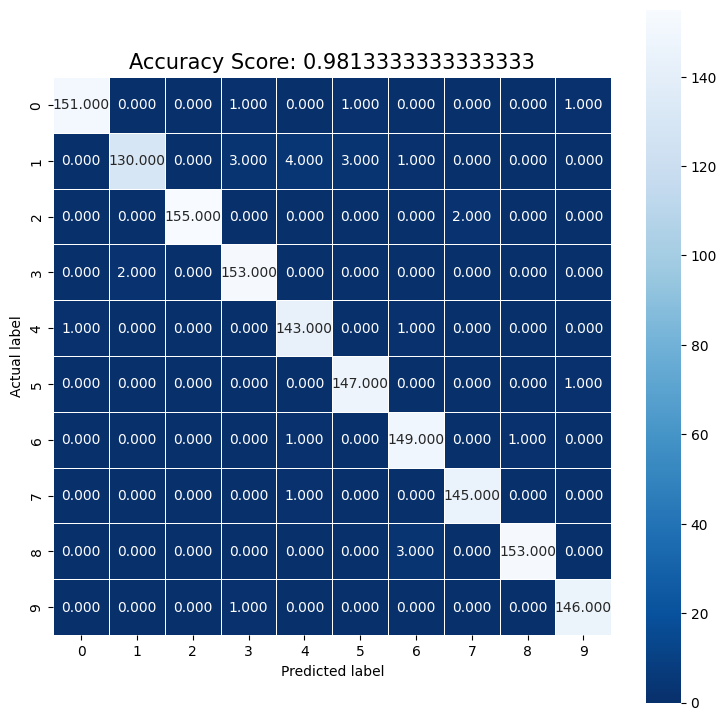

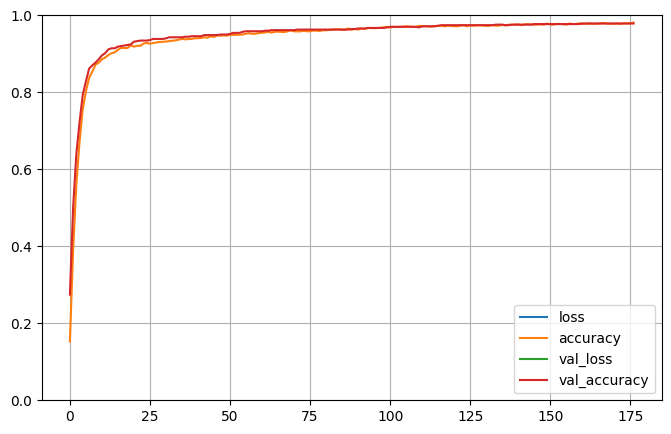

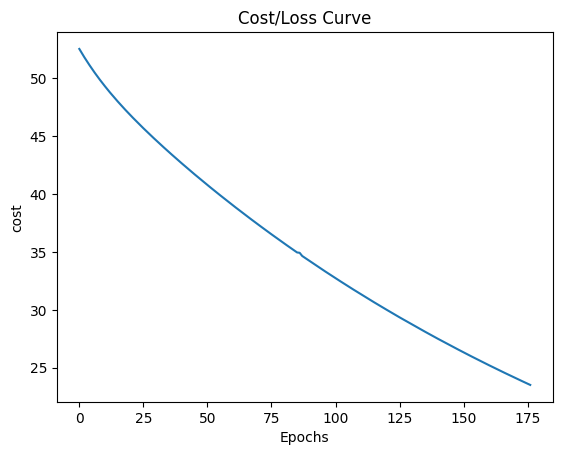

Build Time elapsed:  216.5279598236084
Predict Time elapsed:  0.14850711822509766


In [32]:
# for the hog data
batch_nn_model_set("hog_feat")

Processing the 1D-NN model for  lbp_feat
with number of features:  (3500,)
input size:  10
labels count:  10
Epoch 1/500


2024-03-21 02:31:02.663068: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


88/88 [==============================] - 1s 10ms/step - loss: 2.4193 - accuracy: 0.0893 - val_loss: 2.4011 - val_accuracy: 0.0643
Epoch 2/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4152 - accuracy: 0.0832 - val_loss: 2.3993 - val_accuracy: 0.0600
Epoch 3/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4128 - accuracy: 0.0800 - val_loss: 2.3975 - val_accuracy: 0.0586
Epoch 4/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4138 - accuracy: 0.0779 - val_loss: 2.3959 - val_accuracy: 0.0543
Epoch 5/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4092 - accuracy: 0.0871 - val_loss: 2.3943 - val_accuracy: 0.0571
Epoch 6/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4069 - accuracy: 0.0811 - val_loss: 2.3929 - val_accuracy: 0.0600
Epoch 7/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4073 - accuracy: 0.0746 - val_loss: 2.3914 - val_accuracy: 0.0571
Epoch 8/500
88/88 [=====

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 1s 6ms/step - loss: 2.3528 - accuracy: 0.0543
train set :  [2.352830648422241, 0.05428571254014969]
47/47 [==============================] - 0s 6ms/step - loss: 2.3527 - accuracy: 0.0640
test set :  [2.3527214527130127, 0.06400000303983688]
47/47 [==============================] - 0s 1ms/step
Accuracy on test dataset: 0.064


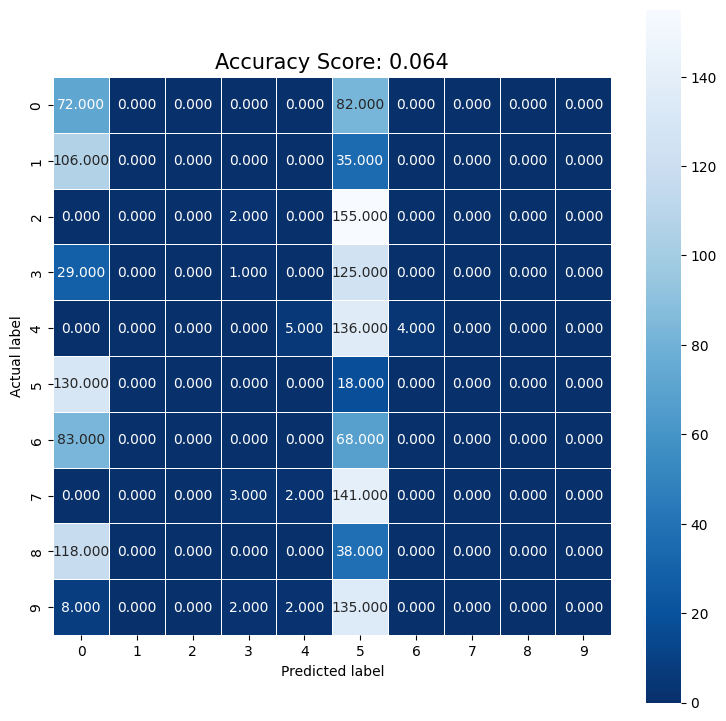

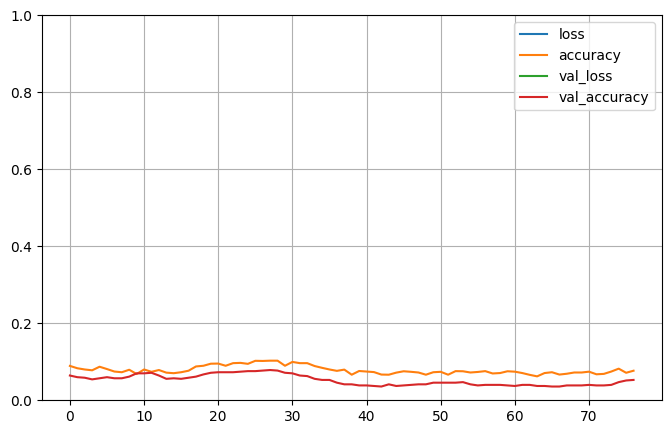

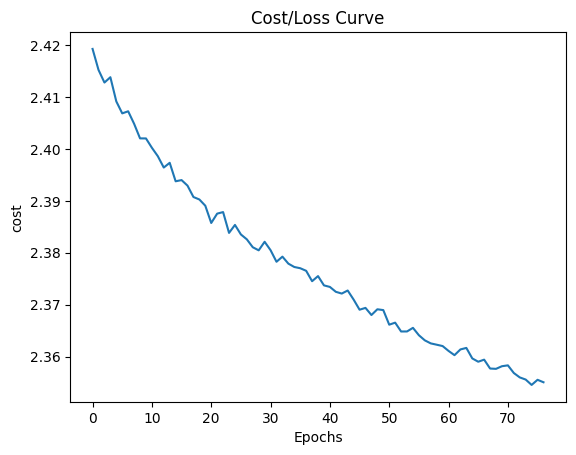

Build Time elapsed:  57.32361888885498
Predict Time elapsed:  0.11788368225097656


In [33]:
# for the lbp data
batch_nn_model_set("lbp_feat")

### Step 3.3. : create the NN model with 2D Data

consider the data is 2D, it is better to use 2D data to train the model.
while the most application are requiring rapid and fast implementation, 
the less code that it implemnent for application, the more maintainance cost that we can drop in App.

Therefore, here are a example of raw 2D data training model, with the Conv2D layer to handle the 2D data.


In [34]:
from pprint import pprint
def batch_nn_2d_model_set():
    """
    Process the 2D-NN model for a given data reference key.

    This function performs the following steps:
    1. Prints the data reference key and the number of features.
    2. Converts the training and test sets to TensorFlow format.
    3. Processes the 2D convolutional neural network model.
    4. Prints the summary of the model.
    5. Evaluates the model on the training and test sets.
    6. Saves the model.
    7. Predicts the labels for the test set.
    8. Computes the confusion matrix for the predicted labels.
    9. Plots the training history of the model.
    10. Plots the loss history of the model.
    11. Prints the elapsed time for building and predicting.

    Returns:
    None
    """
    x_reference_key = "data"
    print("Processing the 2D-NN model for ", x_reference_key)
    print("with number of features: ", X_train_svm[x_reference_key].shape)
    time_start = time.time()
    pprint(X_train_svm[x_reference_key].shape)
    pprint(X_test_svm[x_reference_key].shape)
    tf_train_x, tf_train_y = convert_tf_set_2d( X_train_svm, y_train_raw )
    tf_test_x, tf_test_y = convert_tf_set_2d(X_test_svm, y_test_raw)

    nn_model, model_hist = process_tfnn_2dconv_model(
        tf_train_x, tf_train_y, labels, epochs=500
    )
    nn_model.summary()

    print(
        "train set : ",
        evaluate_tf_model(nn_model, tf_train_x, tf_train_y),
    )
    print(
        "test set : ",
        evaluate_tf_model(nn_model, tf_test_x, tf_test_y),
    )
    save_tf_model(nn_model, x_reference_key)
    predict_time_start = time.time()
    y_predict = nn_model.predict(tf_test_x)
    y_predict = [np.argmax(x) for x in y_predict]
    predict_time_end = time.time()
    confusion_matrix_svm_model(y_test_raw["label_id"].to_list(), y_predict)
    plot_tf_history(model_hist)
    plot_tf_history_lost(model_hist)
    time_end = time.time()
    print("Build Time elapsed: ", time_end - time_start)
    print("Predict Time elapsed: ", predict_time_end - predict_time_start)
    return

Processing the 2D-NN model for  data
with number of features:  (3500,)
(3500,)
(1500,)


Epoch 1/500
88/88 [==============================] - 2s 11ms/step - loss: 73.1391 - accuracy: 0.2782 - val_loss: 13.6257 - val_accuracy: 0.5414
Epoch 2/500
88/88 [==============================] - 1s 7ms/step - loss: 14.1561 - accuracy: 0.6304 - val_loss: 8.3471 - val_accuracy: 0.7686
Epoch 3/500
88/88 [==============================] - 1s 8ms/step - loss: 9.0503 - accuracy: 0.7946 - val_loss: 5.0495 - val_accuracy: 0.8557
Epoch 4/500
88/88 [==============================] - 1s 8ms/step - loss: 4.7705 - accuracy: 0.8811 - val_loss: 4.6641 - val_accuracy: 0.8757
Epoch 5/500
88/88 [==============================] - 1s 8ms/step - loss: 4.0719 - accuracy: 0.8993 - val_loss: 4.4712 - val_accuracy: 0.8900
Epoch 6/500
88/88 [==============================] - 1s 8ms/step - loss: 3.3832 - accuracy: 0.9232 - val_loss: 3.9911 - val_accuracy: 0.9200
Epoch 7/500
88/88 [==============================] - 1s 8ms/step - loss: 2.4758 - accuracy: 0.9404 - val_loss: 3.7122 - val_accuracy: 0.9157
Epoch 8/5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/110 [==============================] - 1s 5ms/step - loss: 4.0204 - accuracy: 0.9971
train set :  [4.020364284515381, 0.9971428513526917]
47/47 [==============================] - 0s 5ms/step - loss: 10.9158 - accuracy: 0.9920
test set :  [10.91580867767334, 0.9919999837875366]
47/47 [==============================] - 0s 3ms/step
Accuracy on test dataset: 0.992


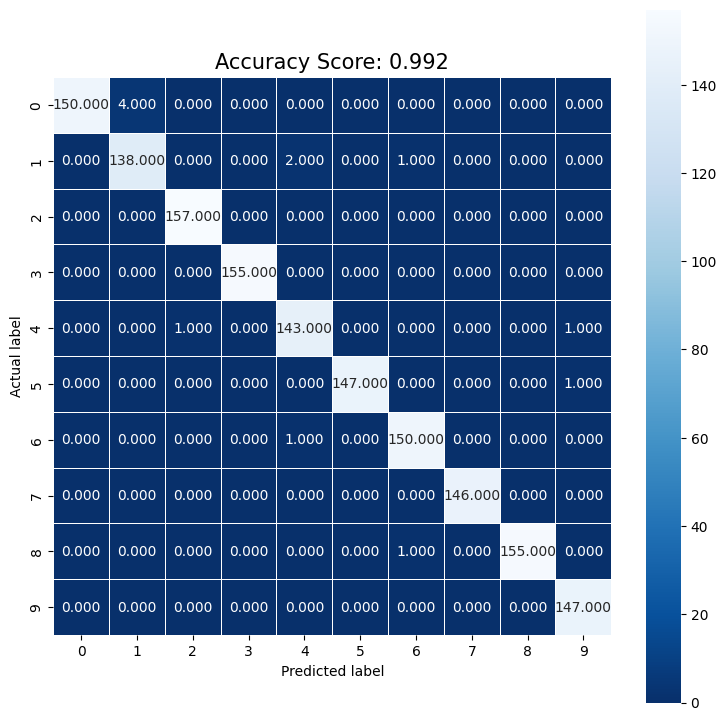

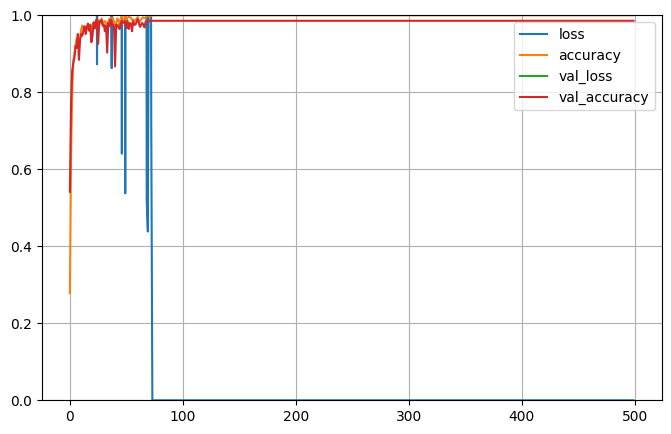

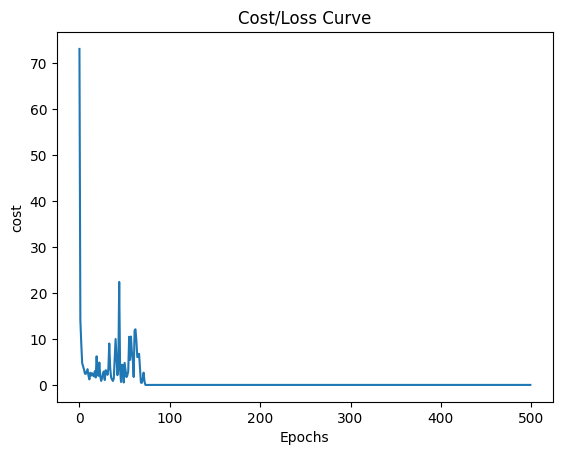

Build Time elapsed:  360.7503969669342
Predict Time elapsed:  0.21147489547729492


In [36]:
batch_nn_2d_model_set()

Remark :

## Step 4 : Model Comparison

by the model evaluation, it concludes that the performance in the Accury, Loss, build time and the prediction time.

### Step 4.1. : Accury and Loss

| Model \ Feature | Raw (1D Array, flatten) | HoG (1D Array)   | LBP (1D Array) | Raw 2D Matrix |
| --------------- | ----------------------- | ---------------- | -------------- | ------------- |
| SVM Model       | 0.99067                 | 0.99733          | 0.564          | --            |
| NN Model        | 0.10267 (Nan)           | 0.9813 (23.4603) | 0.064(2.3527)  | 0.992(4.0204) |


#### SVM Model:
The Support Vector Machine (SVM) model demonstrates high accuracy across all data representations except for LBP (Local Binary Patterns). For the raw (1D array, flatten) representation, the SVM model achieves an accuracy of 99.067%. When using Histogram of Oriented Gradients (HoG), the accuracy increases to 99.733%, showcasing the effectiveness of this feature extraction technique. However, when using LBP, the accuracy drops to 56.4%, indicating that this representation may not capture the necessary features as effectively as others. Interestingly, the table indicates that there is no information available regarding the loss for the SVM model with the Raw 2D Matrix representation, since the model was not trained with multi-dimensional data.

#### NN Model:
The Neural Network (NN) model, in contrast to the SVM, demonstrates varying levels of performance across different data representations. For the raw (1D array, flatten) representation, the accuracy is notably low at 10.267%, with a reported loss of NaN (Not a Number), suggesting potential issues during training such as divergence or numerical instability. However, when utilizing HoG, the accuracy substantially improves to 97.94%, although the loss is relatively high, indicated by a standard deviation of 23.4603. Similarly, with LBP representation, the accuracy is modest at 6.4%, while the associated loss is provided with a standard deviation of 2.3527. Notably, the highest accuracy for the NN model is achieved with the Raw 2D Matrix representation, reaching 99.2%, although with a relatively high loss, as indicated by a standard deviation of 4.0204.

In summary, the table provides insights into the performance of SVM and NN models across different data representations. While SVM demonstrates consistent accuracy with varying levels of effectiveness depending on the representation used, the NN model shows more diverse performance, with significant variations in accuracy and associated loss across different representations. This information is crucial for understanding the suitability of different data representations for training machine learning models and optimizing their performance in various tasks.


### Step 4.2. : Build time

| Model \ Feature | Raw (1D Array, flatten) | HoG (1D Array) | LBP (1D Array) | Raw 2D Matrix |
| --------------- | ----------------------- | -------------- | -------------- | ------------- |
| SVM Model       | 108.88s                 | 15.75s         | 0.94s          | --            |
| NN Model        | 7.73s (Early Call off)  | 216.53s        | 57.32s         | 360.75s       |


#### SVM Model:
The Support Vector Machine (SVM) model demonstrates varying build times depending on the feature representation used. For the Raw (1D Array, flatten) representation, the build time is 108.88 seconds, indicating a moderate time investment. However, when utilizing Histogram of Oriented Gradients (HoG), the build time reduces significantly to 15.75 seconds, showcasing the efficiency of this feature extraction technique. Similarly, for Local Binary Patterns (LBP), the build time is remarkably low at 0.94 seconds, suggesting a swift process. Notably, there is no information available regarding the build time for the SVM model with the Raw 2D Matrix representation, by the model was not allowed to build with multi-dimensional data.

#### NN Model:
In contrast to the SVM model, the Neural Network (NN) model exhibits more diverse build times across different feature representations. For the Raw (1D Array, flatten) representation, the build time is relatively low at 7.73 seconds, accompanied by a note indicating "Early Call off", since the training can early fulfill the Accury score (>0.9, <0.97). When utilizing HoG, the build time increases substantially to 216.53 seconds, indicating a longer process compared to the SVM model's HoG representation. Similarly, for LBP, the build time is 57.32 seconds, suggesting moderate efficiency. The highest build time for the NN model is associated with the Raw 2D Matrix representation, requiring 360.75 seconds, indicating a relatively lengthy process.

Meanwhile, the NN model with the Raw 1D Array can be processed more accurately, if the layer setting is more suitable and the training process is more efficient. 

In summary, the table provides valuable insights into the build times for SVM and NN models trained on different feature representations. While SVM demonstrates generally faster build times across feature representations, with avarage 41.8567s, the NN model showcases more variability, with certain representations requiring notably longer build times, with avarage 160.5825s. 

### Step 4.3. : Prediction time

| Model \ Feature | Raw (1D Array, flatten) | HoG (1D Array) | LBP (1D Array) | Raw 2D Matrix |
| --------------- | ----------------------- | -------------- | -------------- | ------------- |
| SVM Model       | 17.06s                  | 2.68s          | 0.17s          | --            |
| NN Model        | 0.20s                   | 0.15s          | 0.12s          | 0.21s         |


#### SVM Model:
The Support Vector Machine (SVM) model demonstrates varying prediction times depending on the feature representation utilized. For the Raw (1D Array, flatten) representation, the prediction time is 17.06 seconds, indicating a relatively longer time investment for making predictions. However, when employing Histogram of Oriented Gradients (HoG), the prediction time decreases significantly to 2.68 seconds, showcasing the efficiency of this feature extraction technique in reducing computational overhead during inference. Similarly, for Local Binary Patterns (LBP), the prediction time is remarkably low at 0.17 seconds, suggesting a swift prediction process. 

#### NN Model:
In contrast to the SVM model, the Neural Network (NN) model exhibits relatively shorter prediction times across different feature representations. For the Raw (1D Array, flatten) representation, the prediction time is notably lower at 0.20 seconds, indicating efficient inference. When utilizing HoG, the prediction time decreases even further to 0.15 seconds, showcasing the computational efficiency of this representation in the NN model. Similarly, for LBP, the prediction time is 0.12 seconds, suggesting rapid inference. The prediction time for the NN model with the Raw 2D Matrix representation is slightly higher at 0.21 seconds, although still relatively efficient.

In summary, the table provides valuable insights into the prediction times for SVM and NN models using different feature representations. While SVM demonstrates longer prediction times compared to NN across most representations, the NN model generally showcases faster inference times, with relatively consistent performance across different representations. Understanding these prediction times is crucial for assessing the computational efficiency of models using different feature representations, aiding in decision-making processes regarding model deployment and real-time inference capabilities in various applications.

